In [1]:
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [2]:
# Read crypto_data.csv into Pandas
file_path = Path('crypto_data.csv')
df = pd.read_csv(file_path, index_col=[0])
df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [3]:
# Discard all cryptocurrencies that are not being traded.
df = df[df.IsTrading != False]
df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [4]:
# Drop the IsTrading column from the dataframe
df = df.drop(['IsTrading'], axis=1)
df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...
SERO,Super Zero,Ethash,PoW,NaN,1000000000
UOS,UOS,SHA-256,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [5]:
# Remove all rows that have at least one null value
df = df.dropna()
df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [6]:
# Filter for cryptocurrencies that have been mined.
df = df[df['TotalCoinsMined'] > 0]
df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [7]:
# Delete the CoinName from the original dataframe
df = df.drop(['CoinName'], axis=1)
df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Equihash,PoW,7.296538e+06,21000000


In [8]:
# Use Pandas to create dummy variables for Algorithm and ProofType
dummies_df = pd.get_dummies(df, columns=['Algorithm', 'ProofType'])
# dummies_df = pd.get_dummies(df)
dummies_df

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPH,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAP,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BDX,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEN,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Standardize data so that columns with larger values do not affect outcome.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dummies_df)
len(scaled_data[0])

98

# Dimensionality Reduction
#### PCA Model

In [10]:
# Preserve 90% of the explained variance in dimensionality reduction.
pca = PCA(n_components=0.90)
pca_data = pca.fit_transform(scaled_data)
pca_data

array([[-3.35098808e-01,  1.03218907e+00, -5.90713438e-01, ...,
         3.08960988e-15,  2.86606753e-15,  1.58319965e-15],
       [-3.18433948e-01,  1.03233143e+00, -5.91125551e-01, ...,
         4.93371958e-15,  1.80038582e-15,  1.00489363e-15],
       [ 2.30546811e+00,  1.65638302e+00, -6.83616670e-01, ...,
        -6.09849526e-14,  6.98203264e-15, -6.42207786e-14],
       ...,
       [ 3.24348535e-01, -2.31230764e+00,  4.21515366e-01, ...,
         3.76926112e-14,  1.57627124e-15,  4.86009394e-15],
       [-1.49363652e-01, -2.04933553e+00,  4.12968257e-01, ...,
         5.64583013e-16, -2.14316679e-15,  2.95499880e-15],
       [-2.89957500e-01,  8.21194511e-01, -2.76326847e-01, ...,
         4.70610499e-15, -1.63649594e-15,  5.62511848e-15]])

In [11]:
df_pca = pd.DataFrame(data=pca_data)
df_pca

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,-1.308850e-14,-1.266160e-11,2.080310e-14,-0.007129,-1.319756,-0.051813,...,3.459699e-15,2.014069e-15,2.658265e-16,9.165964e-16,1.972844e-15,5.998157e-15,2.236962e-15,3.089610e-15,2.866068e-15,1.583200e-15
1,-0.318434,1.032331,-0.591126,0.001386,-1.323705e-14,-1.255835e-11,2.069088e-14,-0.007739,-1.322514,-0.056674,...,4.477850e-15,1.257149e-15,8.754675e-18,1.248435e-16,3.144746e-15,7.501685e-15,2.309334e-15,4.933720e-15,1.800386e-15,1.004894e-15
2,2.305468,1.656383,-0.683617,0.004731,-2.972731e-14,-4.290588e-11,2.729459e-14,-0.054781,-1.542879,-0.943951,...,1.053780e-14,-3.990608e-14,2.300265e-14,7.314042e-14,-5.883687e-14,-6.653927e-14,-5.448342e-15,-6.098495e-14,6.982033e-15,-6.422078e-14
3,-0.145184,-1.320593,0.192813,-0.001229,7.739934e-15,1.113849e-11,-6.783813e-15,-0.002071,0.281463,0.251862,...,-2.430801e-16,-9.093636e-16,1.426626e-15,9.140362e-15,-1.190865e-14,-2.632450e-15,5.331215e-15,1.479103e-16,-4.780285e-15,-8.217000e-15
4,-0.151768,-2.036192,0.396182,-0.001705,1.629240e-14,1.545822e-11,-1.329989e-14,0.027735,0.519099,0.188820,...,-1.719534e-13,1.779051e-13,-2.645889e-15,-4.405292e-14,-4.455551e-15,1.512555e-14,1.207593e-13,-1.719674e-14,3.827912e-14,2.959987e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,2.471251,0.822241,-0.071160,-0.008206,-5.344446e-14,7.465056e-11,2.497039e-15,-0.851713,2.041159,3.560713,...,-3.053896e-15,1.683480e-15,4.824580e-15,6.535119e-15,-1.528642e-14,-6.831600e-15,1.084022e-14,1.879314e-15,-7.197253e-15,-5.384205e-15
528,-0.333144,1.032071,-0.590740,0.001399,-1.314173e-14,-1.268270e-11,2.071987e-14,-0.007154,-1.320125,-0.052460,...,3.516771e-15,2.102634e-15,2.349544e-16,5.763103e-16,2.203956e-15,6.427495e-15,2.401716e-15,3.410915e-15,2.562621e-15,1.447039e-15
529,0.324349,-2.312308,0.421515,-0.001319,1.233920e-14,1.195249e-11,-1.427522e-14,0.017309,0.161077,-0.047787,...,-3.327072e-14,3.937655e-14,8.733828e-15,-5.518685e-15,-1.835672e-14,-1.113766e-14,4.819937e-14,3.769261e-14,1.576271e-15,4.860094e-15
530,-0.149364,-2.049336,0.412968,-0.001745,1.482173e-14,1.581409e-11,-1.504675e-14,0.028954,0.544389,0.233373,...,1.902365e-15,2.192287e-17,-1.216822e-15,-9.402089e-16,1.287104e-15,4.995983e-15,3.393855e-15,5.645830e-16,-2.143167e-15,2.954999e-15


#### t-SNE on PCA transformation

In [12]:
# Further reduce the dataset dimensions with t-SNE
# Run t-SNE on the principal components
tsne = TSNE(learning_rate=150)
tsne_features = tsne.fit_transform(df_pca)
tsne_features.shape

(532, 2)

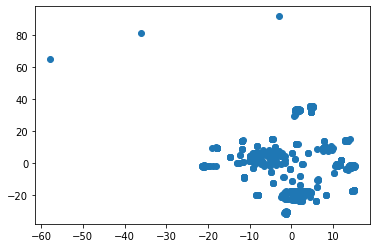

In [13]:
#  Create a scatter plot of the t-SNE output
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

# Cluster Analysis with k-Means


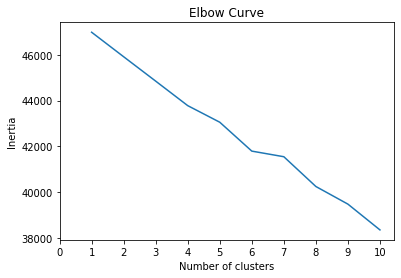

In [14]:
# for-loop to determine the inertia for each k between 1 through 10.
inertia = []
k = list(range(1, 11))

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_pca)
    inertia.append(km.inertia_)

# Create an elbow plot to identify the best number of clusters.
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()